In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
cwd = os.getcwd()
data_filepath= '/data/test/raw/test_1102.txt'
cleaned_datapath = '/data/test/clean/test_1102.txt'

In [3]:
# df_raw = pd.read_table('./data/test/test_1102.txt')

In [4]:
with open(cwd+data_filepath) as file, open(cwd+cleaned_datapath ,'w') as cleanfile:
    for line in file:
        if '#' not in line:
            # if "98:D3:31:30:28:8D" in line: ## read the column names from second line dict 
            cleanfile.write(line)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/data/test/raw/test_1102.txt'

In [55]:
df_raw = pd.read_table(cwd+cleaned_datapath, index_col=False)

In [56]:
df_raw
### data recorded for a total of 136 seconds
## data is recorded in: 4 cols of digital channels, X cols of the analog signal (EMG)

,num,I1,I2,I3,I4,A1
0,0,0,0,0,0,504
1,1,0,0,0,0,508
2,2,0,0,0,0,511
3,3,0,0,0,0,510
4,4,0,0,0,0,508
...,...,...,...,...,...,...
136045,13,0,0,0,0,511
136046,14,0,0,0,0,524
136047,15,0,0,0,0,513
136048,0,0,0,0,0,504


In [57]:
## segment 1 5s window at rest
df_rest = df_raw[10000:15000] 

In [58]:
df_rest

,num,I1,I2,I3,I4,A1
10000,0,0,0,0,0,556
10001,1,0,0,0,0,519
10002,2,0,0,0,0,368
10003,3,0,0,0,0,415
10004,4,0,0,0,0,415
...,...,...,...,...,...,...
14995,3,0,0,0,0,497
14996,4,0,0,0,0,504
14997,5,0,0,0,0,504
14998,6,0,0,0,0,504


In [73]:
## 1 segment at max contraction
df_mvc = df_raw[50000:51000]

In [74]:
df_mvc

,num,I1,I2,I3,I4,A1
50000,0,0,0,0,0,560
50001,1,0,0,0,0,531
50002,2,0,0,0,0,492
50003,3,0,0,0,0,440
50004,4,0,0,0,0,519
...,...,...,...,...,...,...
50995,3,0,0,0,0,355
50996,4,0,0,0,0,204
50997,5,0,0,0,0,359
50998,6,0,0,0,0,768


In [71]:
df_rest['A1'].mean()
df_mvc['A1'].mean()

506.3346

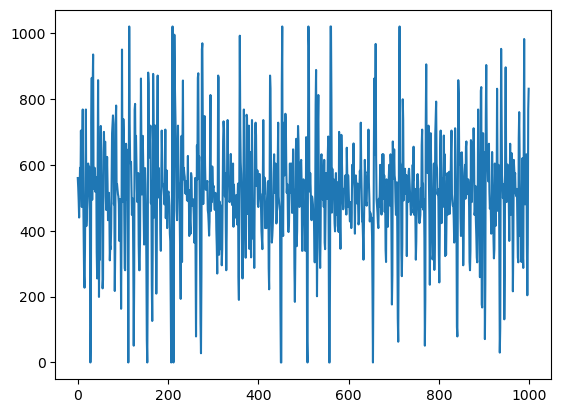

In [75]:
import matplotlib.pyplot as plt 

plt.plot(np.arange(0,1000), df_mvc['A1'])

In [79]:
import pysiology
print(pysiology.__version__)
## https://github.com/Gabrock94/Pysiology

0.0.9.6


In [157]:
emg_sample = df_raw['A1'].tolist()

In [158]:
emg_sample = [samp/1000 for samp in emg_sample]

In [159]:
len(emg_sample)

136050

## Try PySiology package function
https://github.com/Gabrock94/Pysiology/blob/7a1816207366403bb0c575613b435b2875efdee5/pysiology/electromyography.py

In [101]:
import pickle
def loadsampleEDA():
    with open(cwd+'/data/convertedEMG.pkl',"rb") as f:  # Python 3: open(..., 'rb')
        return(pickle.load(f)) #load a fake signal

In [161]:
from src.analyze.emg_processing import analyzeEMG
result_dict = analyzeEMG(emg_sample, 1000, True)

In [164]:
result_dict

{'TimeDomain': {'IEMG': 1426.8022593670034,
  'MAV': 0.010487337444814431,
  'MAV1': 0.007937537193948518,
  'MAV2': 0.0058847358169051645,
  'SSI': 41.15375099415827,
  'VAR': 0.00030249212411820943,
  'TM3': 3.4228762567012566e-06,
  'TM4': 2.06307528821691e-06,
  'TM5': 5.996079745198731e-08,
  'LOG': 1.0105425223135545,
  'RMS': 0.017392236794870203,
  'WL': 547.866838742964,
  'AAC': 0.004026952140705358,
  'DASDV': 4.686432584517459e-05,
  'AFB': 0.8868076228718514,
  'ZC': 6671,
  'MYOP': 0.34133039323778025,
  'WAMP': 4902,
  'SSC': 5823,
  'MAVSLPk': [0.01084011185449596, 0.01190158000686631, 0.008720320473081026],
  'HIST': {1: {'ZC': 719, 'WAMP': 1023},
   2: {'ZC': 532, 'WAMP': 638},
   3: {'ZC': 643, 'WAMP': 370},
   4: {'ZC': 807, 'WAMP': 877},
   5: {'ZC': 1070, 'WAMP': 596},
   6: {'ZC': 512, 'WAMP': 582},
   7: {'ZC': 742, 'WAMP': 151},
   8: {'ZC': 651, 'WAMP': 327},
   9: {'ZC': 996, 'WAMP': 337}}},
 'FrequencyDomain': {'MNF': 58.14685908822624,
  'MDF': 62.5,
  'Pea

## compare the statistics at different MVC 

In [167]:
result_dict['FrequencyDomain']

{'MNF': 58.14685908822624,
 'MDF': 62.5,
 'PeakFrequency': 58.59375,
 'MNP': 3.436226645319702e-06,
 'TTP': 0.0004432732372462416,
 'SM1': 0.02577494646373909,
 'SM2': 7.067521505051391e-07,
 'SM3': 3.427786862353549e-11,
 'FR': 2838.605974707738,
 'PSR': 0.6249019903862328,
 'VCF': -3381.055627432128}

In [170]:
result_dict['FrequencyDomain']

{'MNF': 58.14685908822624,
 'MDF': 62.5,
 'PeakFrequency': 58.59375,
 'MNP': 3.436226645319702e-06,
 'TTP': 0.0004432732372462416,
 'SM1': 0.02577494646373909,
 'SM2': 7.067521505051391e-07,
 'SM3': 3.427786862353549e-11,
 'FR': 2838.605974707738,
 'PSR': 0.6249019903862328,
 'VCF': -3381.055627432128}

In [2]:
df_result = pd.DataFrame(result_dict['FrequencyDomain'], index=[0])
df_result

NameError: name 'result_dict' is not defined